In [15]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import math
import pwlf

In [2]:
interim = pathlib.Path().cwd().parent.parent / 'data' / 'interim'

In [3]:
df = pd.read_csv(interim / 'inc-beta.csv', index_col=0).loc[:'2021-07-22']
# pbdf = pd.read_csv(interim / 'pbdf.csv')

In [37]:
# df.info()
# df.head()
# df

,inc,inc_ppop,inc_rmean,inc_ppop_rmean,inc_cumsum,inc_ppop_cumsum,inc_log
2021-05-27,36,0.40,NaN,NaN,36,0.40,1.556303
2021-05-28,31,0.34,NaN,NaN,67,0.74,1.491362
2021-05-29,43,0.48,NaN,NaN,110,1.22,1.633468
2021-05-30,63,0.70,NaN,NaN,173,1.92,1.799341
2021-05-31,32,0.35,NaN,NaN,205,2.27,1.505150
2021-06-01,56,0.62,NaN,NaN,261,2.89,1.748188
2021-06-02,15,0.17,39.428571,0.437143,276,3.06,1.176091
2021-06-03,56,0.62,42.285714,0.468571,332,3.68,1.748188
2021-06-04,25,0.28,41.428571,0.460000,357,3.96,1.397940
2021-06-05,26,0.29,39.000000,0.432857,383,4.25,1.414973


In [38]:
df['inc_cumsum_log'] = df.inc_cumsum.apply(lambda x: math.log(x, 10))

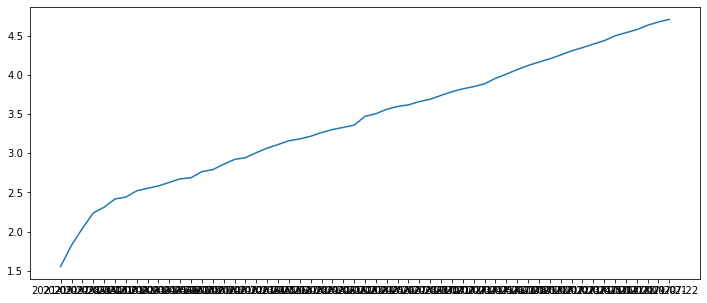

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))
# ax.plot(df.index, df.inc)
ax.plot(df.index, df.inc_cumsum_log)

In [40]:
x = np.arange(0, len(df.index))
x0 = [min(x), 4, 13, 27, 43, max(x)]

In [47]:
list(df.index).index('2021-07-22')

56

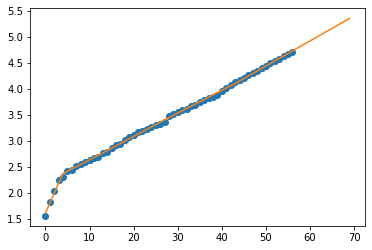

In [62]:
my_pwlf = pwlf.PiecewiseLinFit(x, df.inc_cumsum_log)

# fit the data with the specified break points
# (ie the x locations of where the line segments
# will terminate)
my_pwlf.fit_with_breaks(x0)
xHat = np.arange(min(x), max(x) + 14)
yHat = my_pwlf.predict(xHat)
plt.figure()
plt.plot(x, df.inc_cumsum_log, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

In [63]:
yHat2 = [10 ** yh for yh in yHat]


In [65]:
yHat2[63]

115714.90160805415

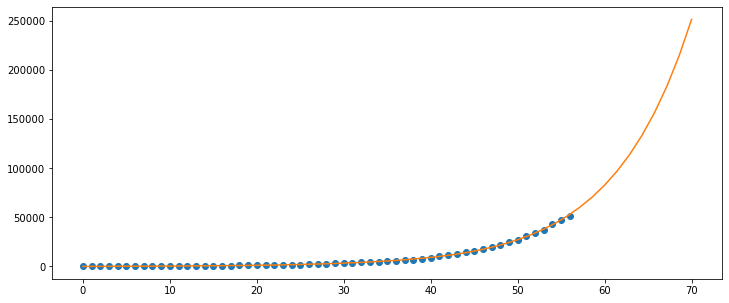

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(x, df.inc_cumsum, 'o')
plt.plot(xHat, yHat2, '-')
plt.show()